In [1]:
import os

os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

In [2]:
import os
import pickle
import pystan
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import multiprocessing
import itertools as it
from scipy.special import expit
import pymc3 as pm
import arviz as az

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
# multiprocessing.set_start_method("fork")
sns.set()  # Nice plot aesthetic

In [5]:
bkp_folder = 'bkp'
os.makedirs(bkp_folder, exist_ok=True)

# Toy example

In [112]:
def true_f(x):
    return x**0.7

x = np.random.random(size=10)
y = true_f(x)

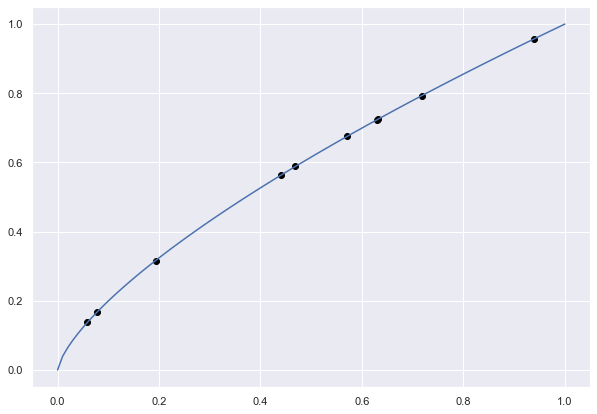

In [119]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x, y, c="black")

x_plot = np.linspace(0, 1, 100)
ax.plot(x_plot, true_f(x_plot))

In [120]:
with pm.Model() as toy_model:

    # Lengthscale
    ρ = pm.HalfCauchy('ρ', 5)
    η = pm.HalfCauchy('η', 5)
    
    M = pm.gp.mean.Linear(coeffs=0)
    K = (η**2) * pm.gp.cov.ExpQuad(1, ρ) 
    
    σ = pm.HalfNormal('σ', 50)
    
    gp = pm.gp.Marginal(mean_func=M, cov_func=K)
    gp.marginal_likelihood('y', X=x.reshape(-1, 1), y=y, noise=σ)
    

INFO:filelock:Lock 4949876256 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4949876256 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4949736656 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4949736656 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4950101728 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4950101728 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4950204720 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4950204720 released on /Users/aureliennioche/.theano/comp

In [121]:
with toy_model:
    gp_trace = pm.sample(1000, tune=2000, cores=2, random_seed=42)

INFO:filelock:Lock 4951668672 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951668672 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951742112 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951742112 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951235120 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951235120 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4949843872 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4949843872 released on /Users/aureliennioche/.theano/comp

INFO:pymc3:Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 25 seconds.
ERROR:pymc3:There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


In [122]:
# with gp_salmon_model:
#     fit = pm.find_MAP()
# fit

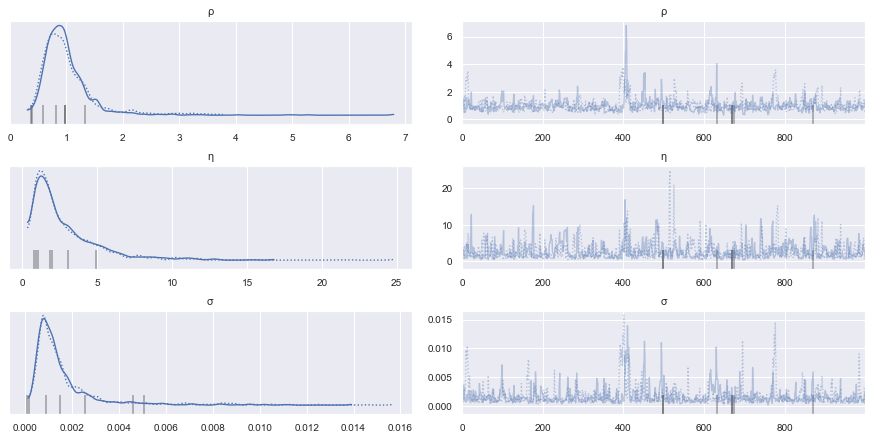

In [123]:
az.plot_trace(gp_trace, var_names=['ρ', 'η', 'σ']);

In [124]:
x_pred = np.linspace(0, 1, 100)
with toy_model:
    y_pred = gp.conditional("y_pred", x_pred.reshape(-1, 1))
    samples = pm.sample_posterior_predictive(gp_trace, var_names=["y_pred"], samples=3, random_seed=42)

INFO:filelock:Lock 4959962208 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4959962208 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock


INFO:filelock:Lock 4951668960 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951668960 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951249152 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951249152 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951670016 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4951670016 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4892089840 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4892089840 released on /Users/aureliennioche/.theano/comp

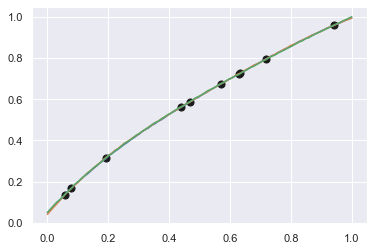

In [125]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y, c='k', s=50)
# ax.set_ylim(0, None)
for y_ in samples['y_pred']:
    ax.plot(x_pred, y_);

In [25]:
with toy_model:
    more_samples = pm.sample_posterior_predictive(gp_trace, var_names=["y_pred"], samples=100, random_seed=42)

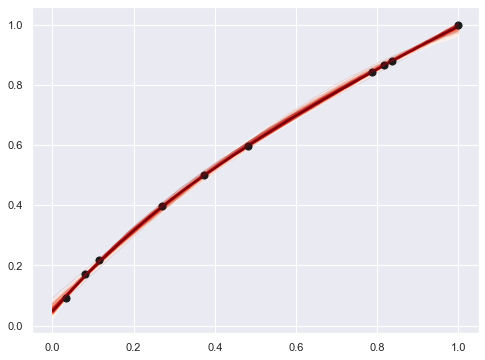

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
pm.gp.util.plot_gp_dist(ax, more_samples['y_pred'], x_pred)
ax.scatter(x=x, y=y, c='k', s=50)

In [72]:
with gp_salmon_model:
    salmon_pred_noise = recruit_gp.conditional("salmon_pred_noise", X_pred.reshape(-1,1), pred_noise=True)
    gp_salmon_samples = pm.sample_posterior_predictive(gp_trace, var_names=["salmon_pred_noise"], samples=500, random_seed=42)

# Toy model 2

In [128]:
def true_f(x):
    return np.sign(x)*np.abs(x)**0.7

x = np.random.uniform(-2, 2, size=100)
x.sort()
u = true_f(x)
p_logit = 1/(1+np.exp(-3.33*u))
y = p_logit > np.random.random(len(x))

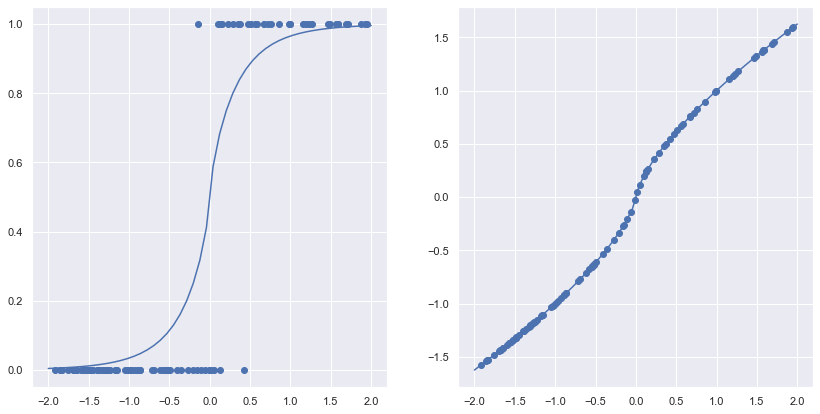

In [129]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))
ax = axes[0]
ax.scatter(x, y)
x_plot = np.linspace(-2, 2, )
ax.plot(x_plot, 1/(1+np.exp(-3.33*np.sign(x_plot)*np.abs(x_plot)**0.7)))

ax = axes[1]
ax.scatter(x, u)
ax.plot(x_plot, true_f(x_plot))

In [130]:
with pm.Model() as toy_model:
    
    ρ = pm.Normal('ρ', 1)
    η = pm.Normal('η', 1)
    
    K = η**2 * pm.gp.cov.ExpQuad(1, ρ)
    gp = pm.gp.Latent(cov_func=K)
    
    f = gp.prior('f', X=x.reshape(-1, 1))
    p = pm.Deterministic('p', pm.math.invlogit(3.33*f))
    y_ = pm.Bernoulli('y', p=p, observed=y)

INFO:filelock:Lock 4933909472 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4933909472 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4868823936 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4868823936 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4939168976 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4939168976 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4939166672 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4939166672 released on /Users/aureliennioche/.theano/comp

In [131]:
with toy_model:
    trace = pm.sample(1000, tune=1000, chains=2)

INFO:filelock:Lock 4948703888 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4948703888 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4889181008 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4889181008 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4935009328 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4935009328 released on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4947958848 acquired on /Users/aureliennioche/.theano/compiledir_macOS-11.2-x86_64-i386-64bit-i386-3.9.1-64/.lock
INFO:filelock:Lock 4947958848 released on /Users/aureliennioche/.theano/comp

INFO:pymc3:Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 85 seconds.
ERROR:pymc3:There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


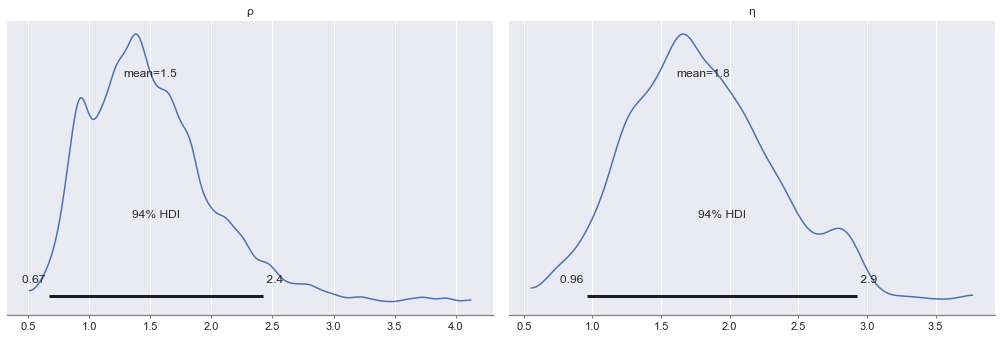

In [132]:
az.plot_posterior(trace, var_names=['ρ', 'η']);

In [133]:
with toy_model:
    y_pred = pm.sample_posterior_predictive(trace, var_names=["f", "p"], samples=1000)

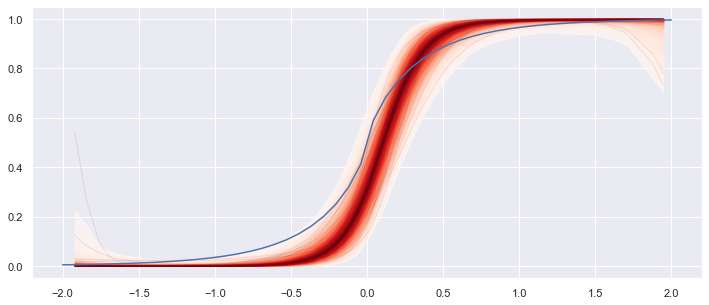

In [134]:
# link function
def invlogit(x, eps=np.finfo(np.double).resolution):
    return (1.0 + 2.0 * eps) / (1.0 + np.exp(-x)) + eps

fig, ax = plt.subplots(figsize=(12,5))

pm.gp.util.plot_gp_dist(ax, invlogit(3.33*y_pred["f"]), x)
ax.plot(x_plot, 1/(1+np.exp(-3.33*np.sign(x_plot)*np.abs(x_plot)**0.7)))

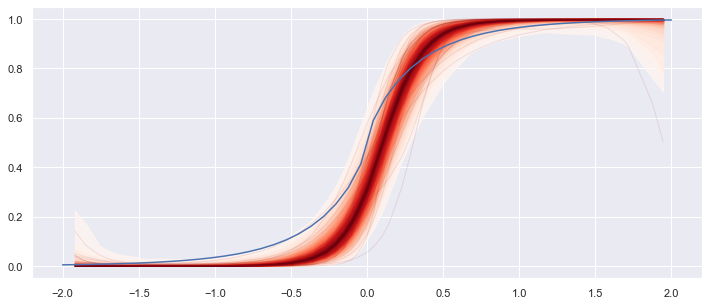

In [135]:
fig, ax = plt.subplots(figsize=(12,5))

pm.gp.util.plot_gp_dist(ax, y_pred["p"], x)
ax.plot(x_plot, 1/(1+np.exp(-3.33*np.sign(x_plot)*np.abs(x_plot)**0.7)))

(-2.0, 2.0)

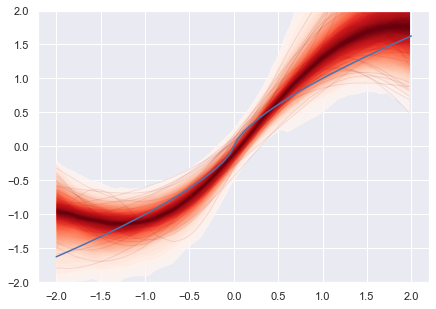

In [110]:
fig, ax = plt.subplots(figsize=(7,5))

pm.gp.util.plot_gp_dist(ax, y_pred["f"], x)
ax.plot(x_plot, np.sign(x_plot)*np.abs(x_plot)**0.7)

ax.set_ylim(-2, 2)

## Lottery data

In [6]:
np.random.seed(123)

In [7]:
def u(x, alpha):
    return x**(1 - alpha)

In [8]:
# steps = np.linspace(0.01,0.99, 10)
# task = pd.DataFrame(np.array(list(it.product(steps, repeat=4))), columns=["p0", "x0", "p1", "x1"])
task = pd.DataFrame(np.random.random(size=(1000, 4)), columns=["p0", "x0", "p1", "x1"])
task = task[~((task.p0 >= task.p1) & (task.x0 >= task.x1))]
task = task[~((task.p1 >= task.p0) & (task.x1 >= task.x0))]
task.reset_index(inplace=True, drop=True)

In [9]:
n_trial = len(task)

tau = 0.1
true_alpha = 0.4

seu0 = task.p0 * u(task.x0, true_alpha)
seu1 = task.p1 * u(task.x1, true_alpha)

p_choice_1 = scipy.stats.norm.cdf(seu1 - seu0) # expit((seu1 - seu0)/tau)

choice = np.zeros(n_trial, dtype=int)
choice[:] = p_choice_1 > np.random.random(size=n_trial)
task["choice"] = choice
task

,p0,x0,p1,x1,choice
0,0.696469,0.286139,0.226851,0.551315,1
1,0.480932,0.392118,0.343178,0.729050,0
2,0.438572,0.059678,0.398044,0.737995,0
3,0.634401,0.849432,0.724455,0.611024,1
4,0.426351,0.893389,0.944160,0.501837,0
...,...,...,...,...,...
500,0.116790,0.934562,0.280638,0.189423,0
501,0.924761,0.156253,0.298057,0.178112,1
502,0.167810,0.716638,0.535513,0.600545,1
503,0.521893,0.741486,0.875329,0.448498,0


In [10]:
n = 20 
selec = np.random.choice(np.arange(len(task)), size=n, replace=False)
p = np.concatenate((task.p0.values[selec], task.p1.values[selec])).T
x = np.concatenate((task.x0.values[selec], task.x1.values[selec])).T
y = task.choice.values[selec]
print("p", p)
print("x", x)
print("y", y)
data = {"p": p, "x": x, "y": y, "n_x": len(x), "n_y": len(y), "tau": tau}

p [0.82603597 0.96848212 0.17186536 0.35626065 0.06853658 0.54422271
 0.03084589 0.04503958 0.83418593 0.76939734 0.13185707 0.8535834
 0.92458903 0.47702151 0.43857224 0.65490077 0.11343058 0.93193215
 0.83790816 0.38332119 0.28330238 0.69871608 0.31919756 0.25139867
 0.10005466 0.03539336 0.52266599 0.65475264 0.6974982  0.10263526
 0.01675027 0.38865199 0.73774199 0.83090753 0.39804426 0.07215178
 0.48874966 0.20609573 0.38818585 0.2749956 ]
x [0.0213897  0.35821032 0.82005329 0.25581268 0.2075107  0.0222724
 0.49683023 0.67269851 0.40737468 0.57377411 0.02727462 0.16193532
 0.85489171 0.84685675 0.0596779  0.59684939 0.97224561 0.58217546
 0.92409405 0.28030394 0.53530624 0.462476   0.12566459 0.31745268
 0.00338436 0.23806151 0.28577249 0.10174605 0.95599989 0.69983407
 0.84605277 0.55418508 0.87354142 0.01735057 0.73799541 0.63289043
 0.06224207 0.71775756 0.93831583 0.91810036]
y [0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0]
